# Industrial IoT Failure Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d canozensoy/industrial-iot-dataset-synthetic

Dataset URL: https://www.kaggle.com/datasets/canozensoy/industrial-iot-dataset-synthetic
License(s): apache-2.0
 93%|███████████████████████████████████▎  | 15.0M/16.1M [00:02<00:00, 13.5MB/s]
100%|██████████████████████████████████████| 16.1M/16.1M [00:02<00:00, 5.99MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Industrial IoT Failure Prediction/industrial-iot-dataset-synthetic.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Industrial IoT Failure Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('factory_sensor_simulator_2040.csv')

In [3]:
df = df.head(10000)

In [4]:
df.shape

(10000, 22)

In [5]:
df.size

220000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Machine_ID                  10000 non-null  object 
 1   Machine_Type                10000 non-null  object 
 2   Installation_Year           10000 non-null  int64  
 3   Operational_Hours           10000 non-null  int64  
 4   Temperature_C               10000 non-null  float64
 5   Vibration_mms               10000 non-null  float64
 6   Sound_dB                    10000 non-null  float64
 7   Oil_Level_pct               10000 non-null  float64
 8   Coolant_Level_pct           10000 non-null  float64
 9   Power_Consumption_kW        10000 non-null  float64
 10  Last_Maintenance_Days_Ago   10000 non-null  int64  
 11  Maintenance_History_Count   10000 non-null  int64  
 12  Failure_History_Count       10000 non-null  int64  
 13  AI_Supervision              1000

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Installation_Year,10000.0,2019.936300,11.836530,2000.00,2010.0000,2020.000,2030.0000,2040.00
Operational_Hours,10000.0,50327.767200,28639.580928,17.00,25424.2500,50136.000,75143.5000,99999.00
Temperature_C,10000.0,60.223442,14.976142,5.80,50.0000,60.145,70.2500,116.75
Vibration_mms,10000.0,10.021269,5.079731,-8.93,6.5900,10.020,13.4300,31.07
Sound_dB,10000.0,75.001994,10.094797,38.56,68.2100,75.200,81.7200,113.23
Oil_Level_pct,10000.0,69.314520,19.041836,0.00,56.3525,70.080,83.5725,100.00
Coolant_Level_pct,10000.0,64.099422,23.369836,0.00,47.6900,65.370,81.9700,100.00
Power_Consumption_kW,10000.0,149.855931,79.945032,-130.50,96.1400,150.530,204.3500,498.26
Last_Maintenance_Days_Ago,10000.0,181.772500,105.308511,0.00,90.0000,182.000,273.0000,365.00
Maintenance_History_Count,10000.0,5.015500,2.250903,0.00,3.0000,5.000,6.0000,15.00


In [8]:
df.isnull().sum()

Machine_ID                       0
Machine_Type                     0
Installation_Year                0
Operational_Hours                0
Temperature_C                    0
Vibration_mms                    0
Sound_dB                         0
Oil_Level_pct                    0
Coolant_Level_pct                0
Power_Consumption_kW             0
Last_Maintenance_Days_Ago        0
Maintenance_History_Count        0
Failure_History_Count            0
AI_Supervision                   0
Error_Codes_Last_30_Days         0
Remaining_Useful_Life_days       0
Failure_Within_7_Days            0
Laser_Intensity               9696
Hydraulic_Pressure_bar        9447
Coolant_Flow_L_min            9111
Heat_Index                    9074
AI_Override_Events               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

Machine_ID                    10000
Machine_Type                     33
Installation_Year                41
Operational_Hours              9532
Temperature_C                  4760
Vibration_mms                  2267
Sound_dB                       3742
Oil_Level_pct                  5025
Coolant_Level_pct              5499
Power_Consumption_kW           8453
Last_Maintenance_Days_Ago       366
Maintenance_History_Count        16
Failure_History_Count            11
AI_Supervision                    2
Error_Codes_Last_30_Days         12
Remaining_Useful_Life_days     1025
Failure_Within_7_Days             2
Laser_Intensity                 288
Hydraulic_Pressure_bar          522
Coolant_Flow_L_min              791
Heat_Index                      903
AI_Override_Events               10
dtype: int64

## Data Visualization

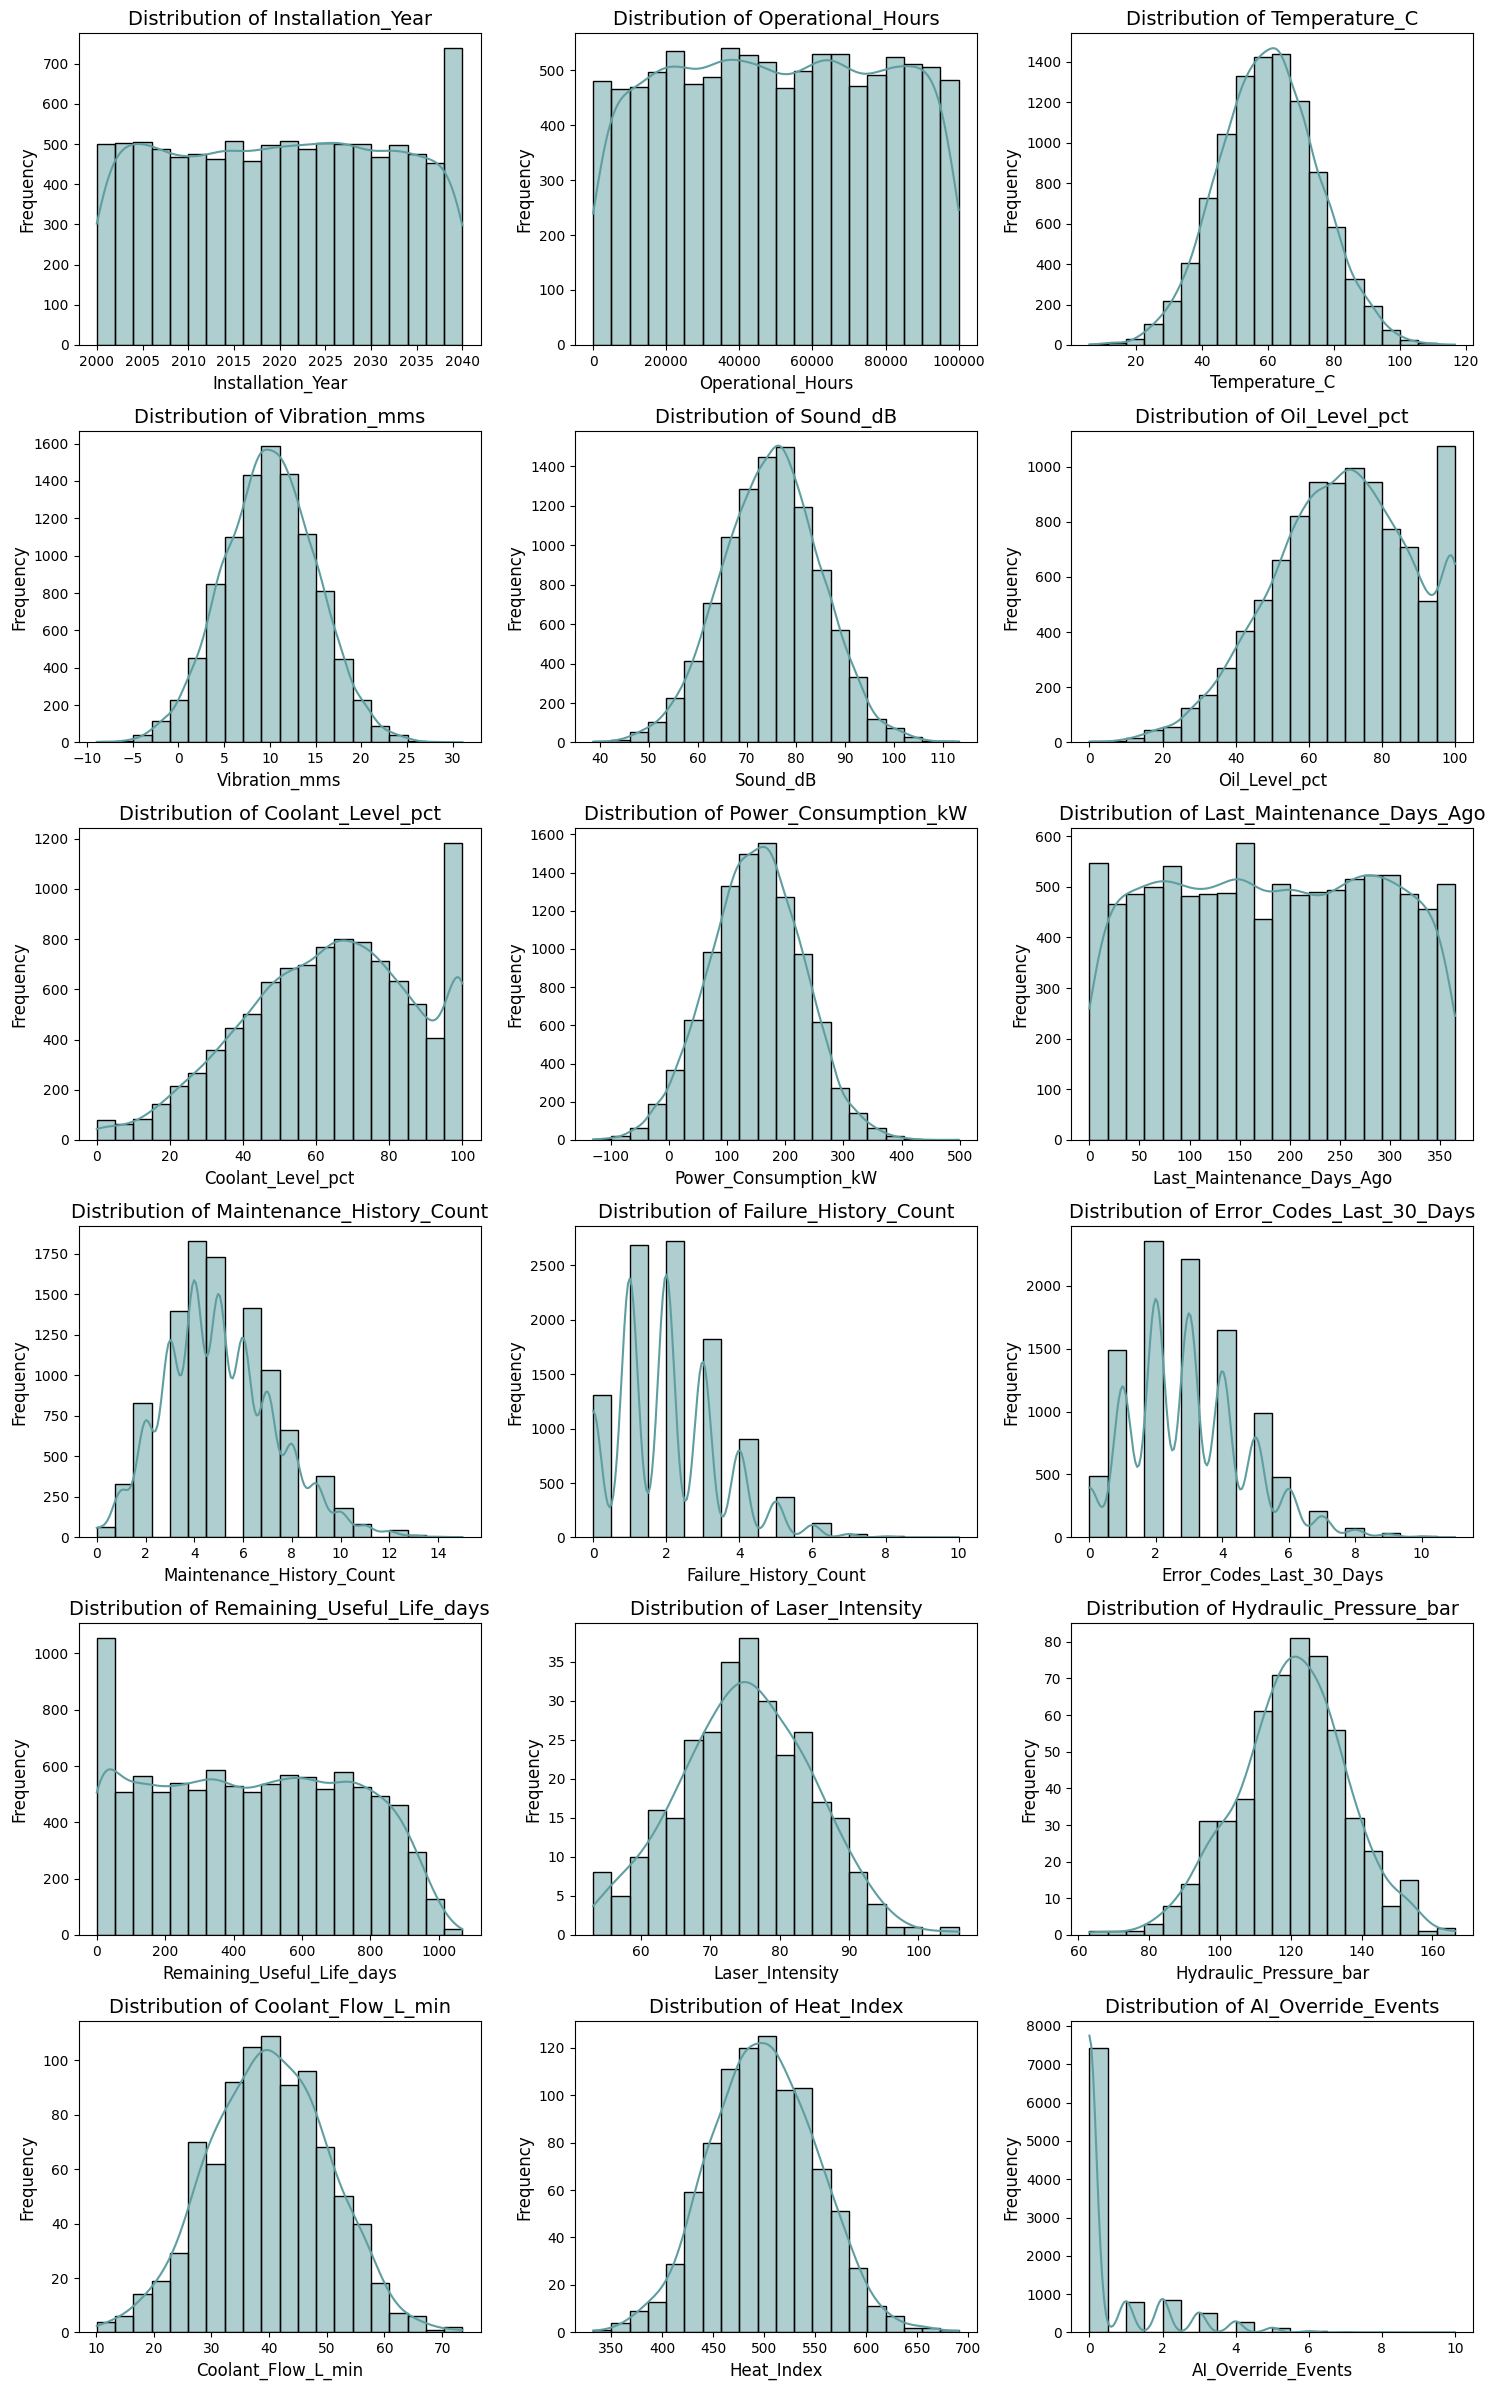

In [11]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

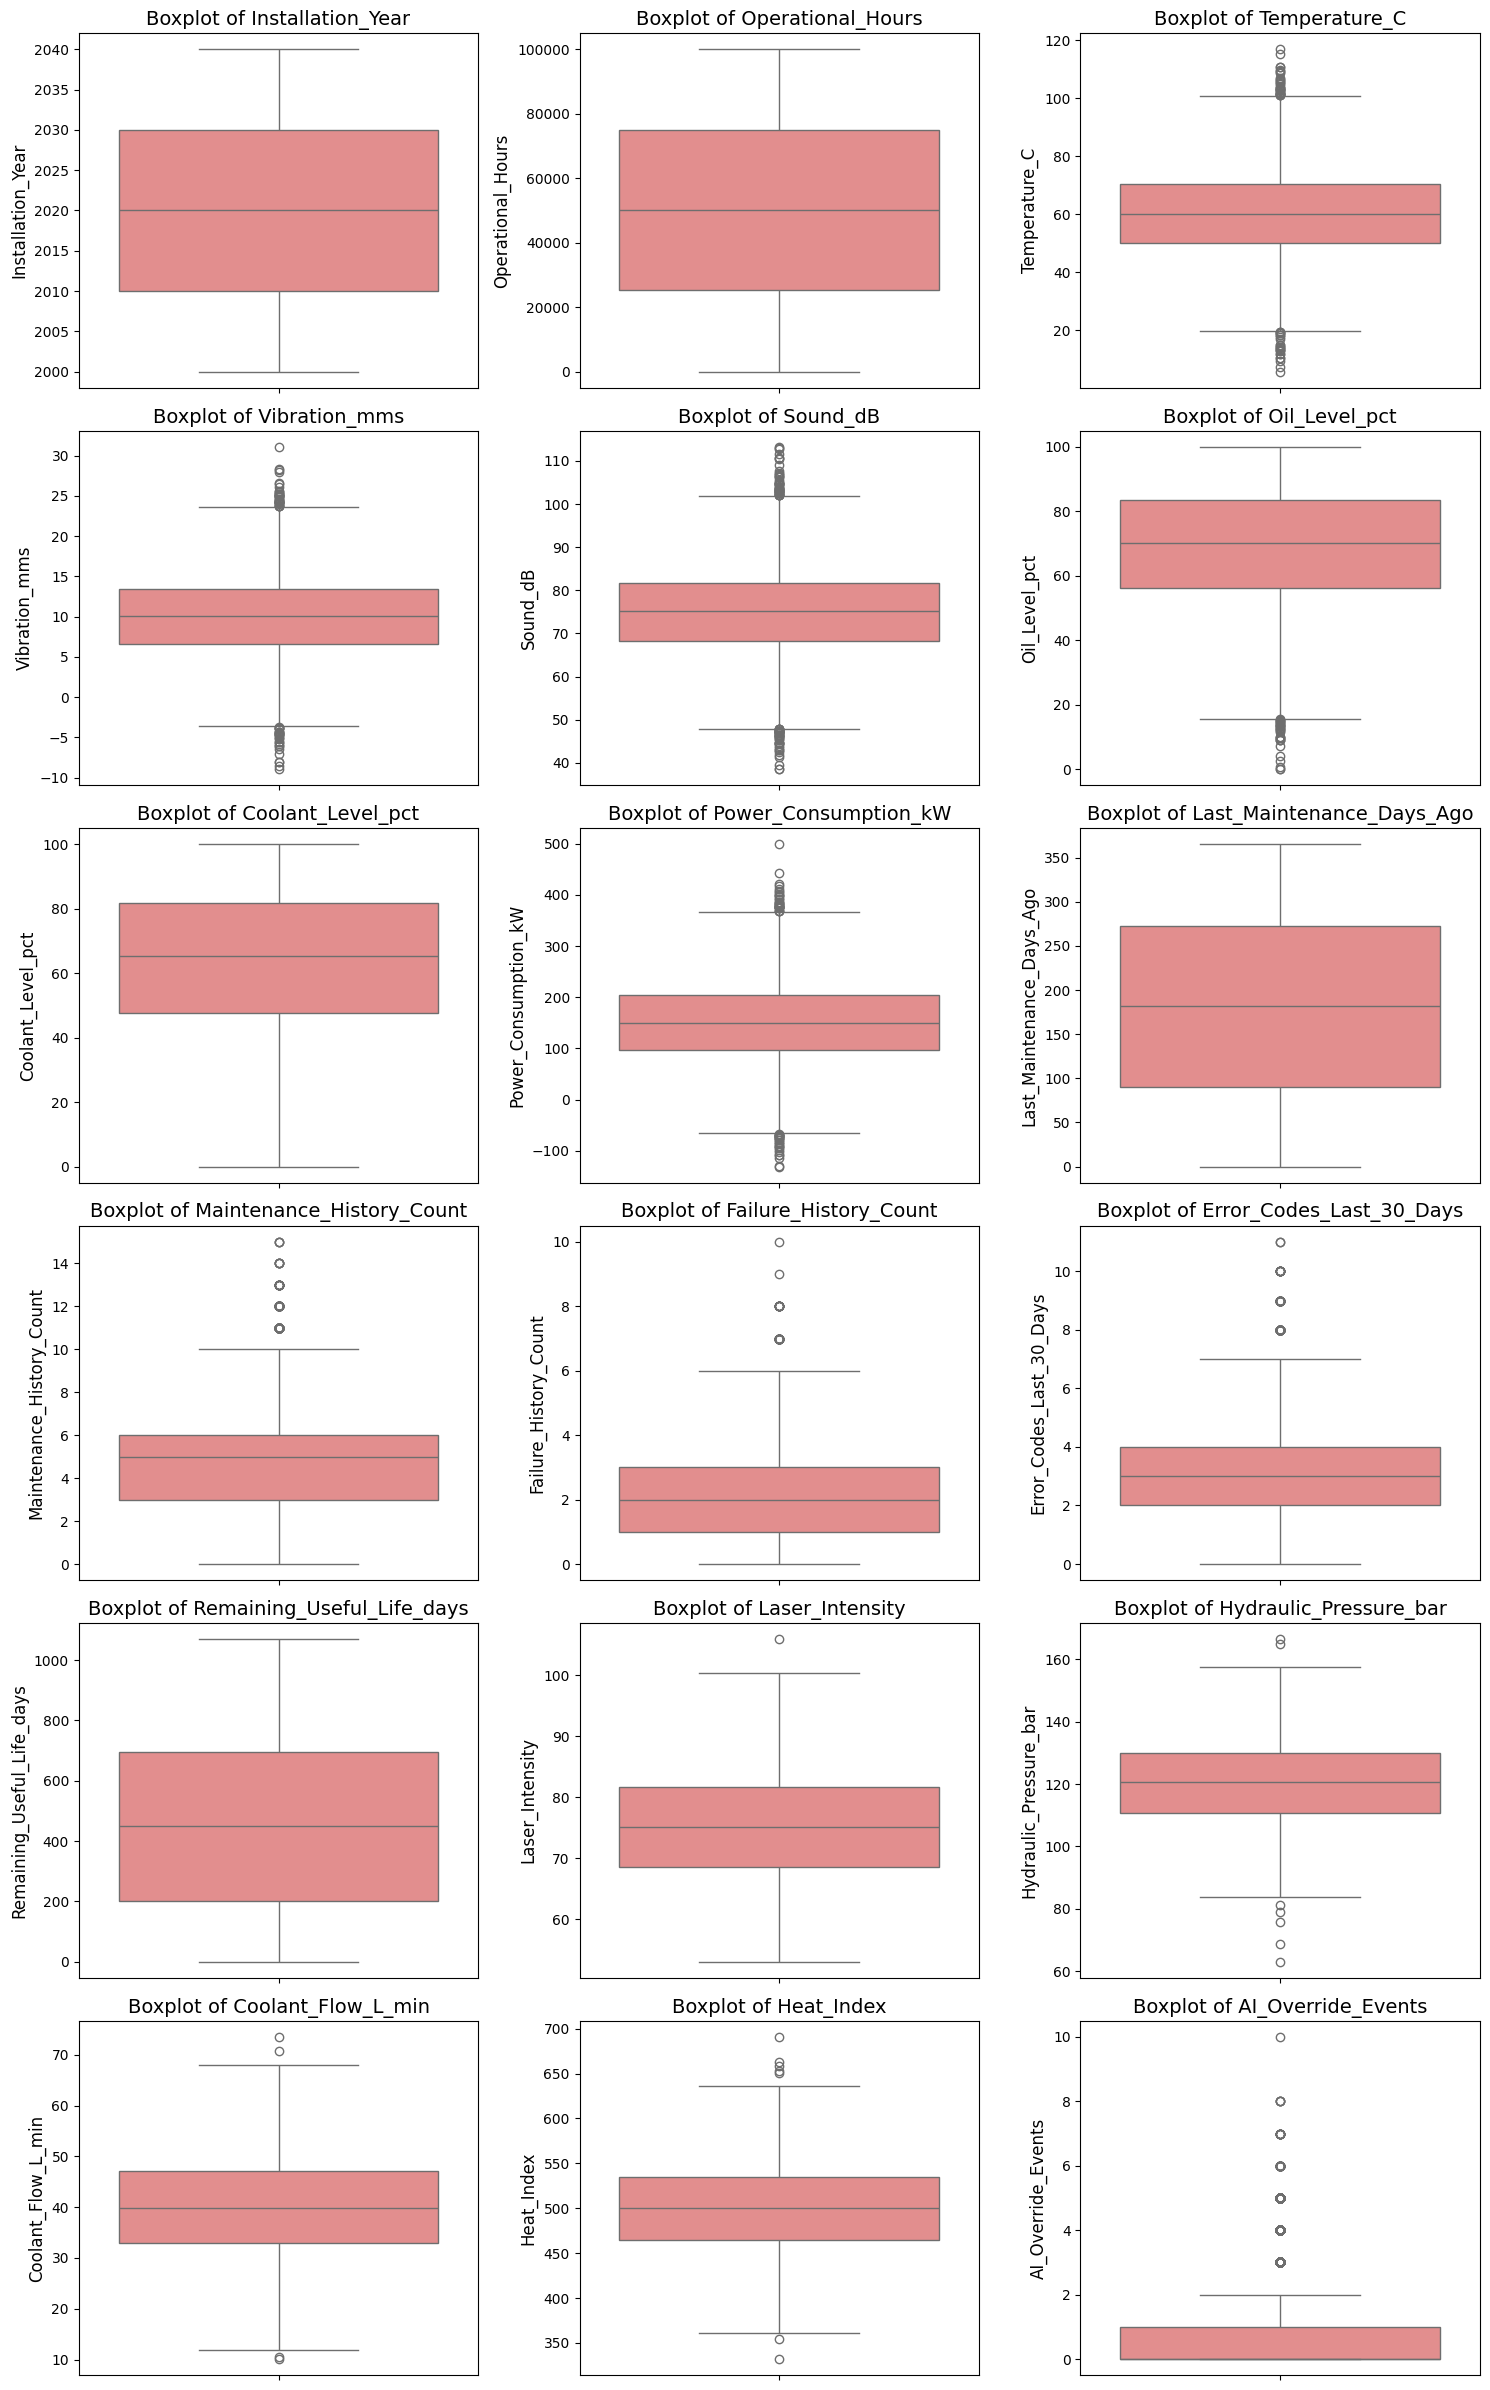

In [12]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

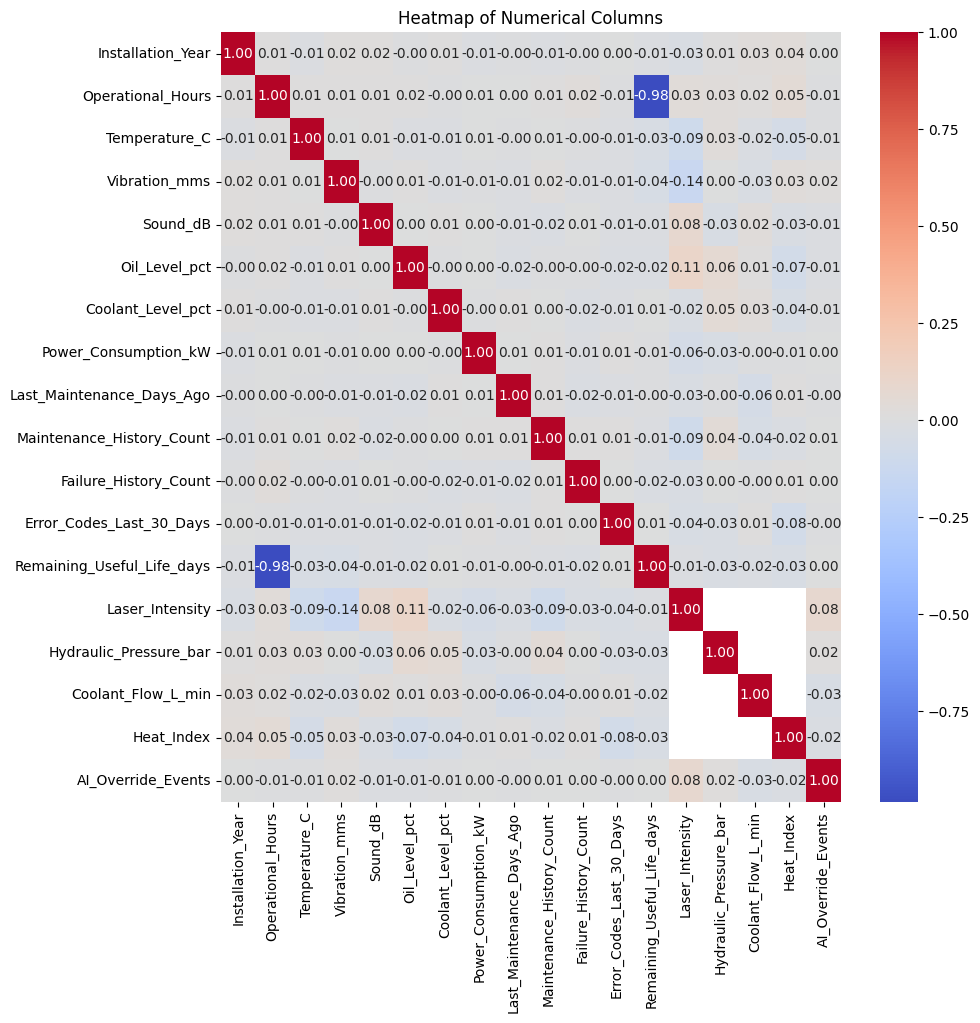

In [13]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [14]:
# Dropping unwanted column

df.drop(['Machine_ID','Laser_Intensity','Hydraulic_Pressure_bar','Coolant_Flow_L_min','Heat_Index'], axis=1, inplace=True)

In [15]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [16]:
X = df.drop(columns=['Failure_Within_7_Days'])
y = df['Failure_Within_7_Days']

In [17]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [19]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [21]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.989, 0.9395, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 0.962]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1879
           1       0.88      0.95      0.91       121

    accuracy                           0.99      2000
   macro avg       0.94      0.97      0.95      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1863   16]
 [   6  115]]


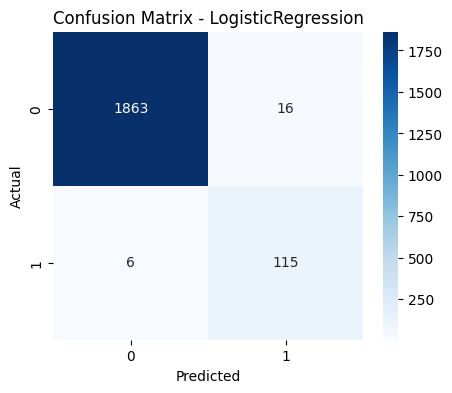

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1879
           1       0.00      0.00      0.00       121

    accuracy                           0.94      2000
   macro avg       0.47      0.50      0.48      2000
weighted avg       0.88      0.94      0.91      2000

Confusion Matrix:
 [[1879    0]
 [ 121    0]]


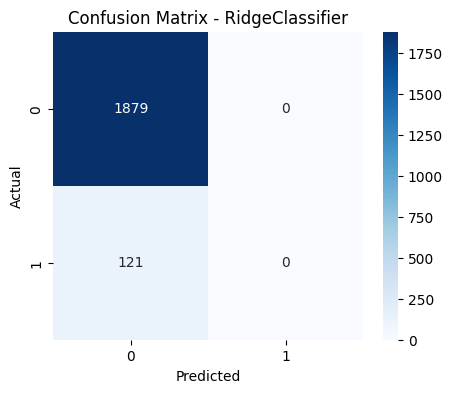

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       0.97      1.00      0.98       121

    accuracy                           1.00      2000
   macro avg       0.98      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1875    4]
 [   0  121]]


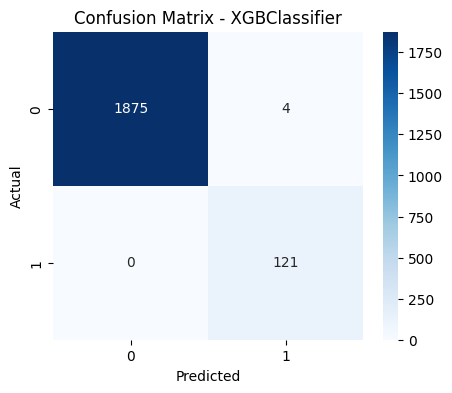

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


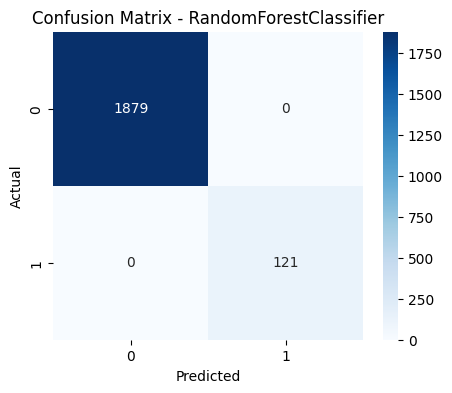

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


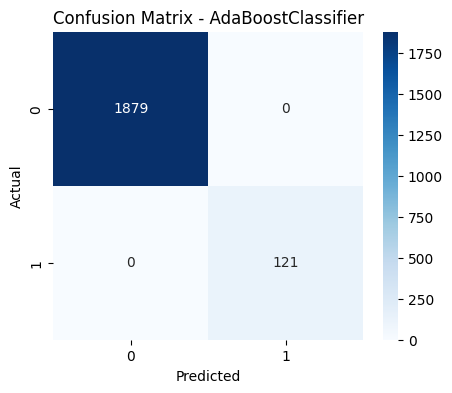

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


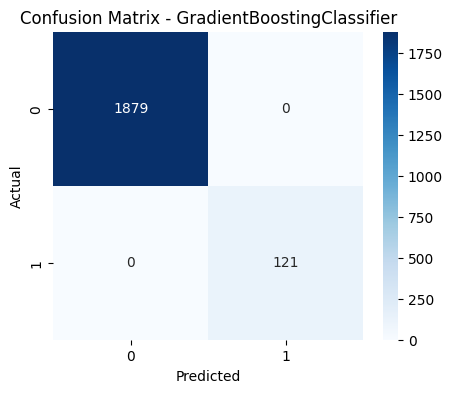

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


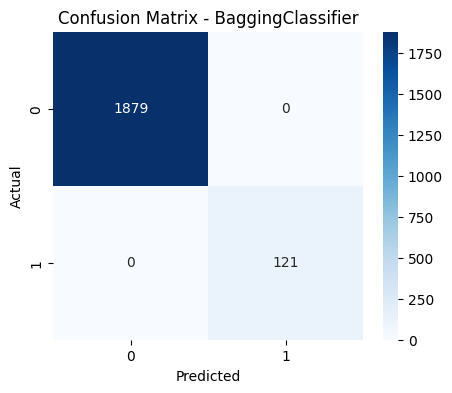

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


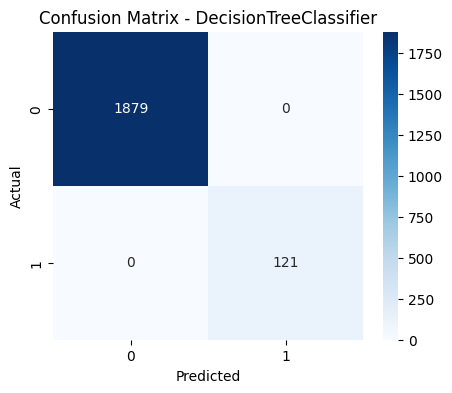

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1879
           1       0.75      0.55      0.64       121

    accuracy                           0.96      2000
   macro avg       0.86      0.77      0.81      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
 [[1857   22]
 [  54   67]]


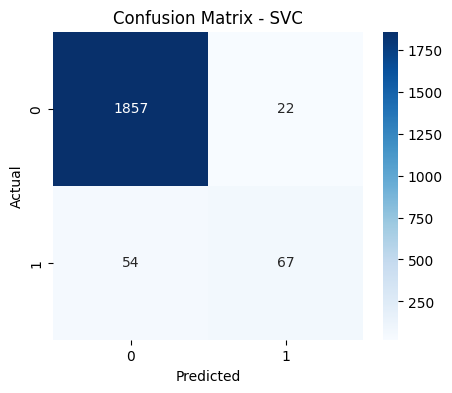

In [22]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()